In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import os
import cv2
from PIL import Image,ImageTk
from tensorflow.keras.models import load_model
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("./mnist.csv")
data.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [4]:
train = pd.read_csv("./train.csv")

In [5]:
test = pd.read_csv("./test.csv")

In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data_entrainement=train
X_train=data_entrainement.drop(["label"],axis=1)
Y_train=train["label"]

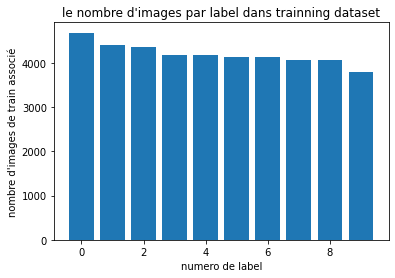

In [8]:
Y_train.value_counts()
plt.bar(range(10),Y_train.value_counts())
plt.title("le nombre d'images par label dans trainning dataset")
plt.xlabel("numero de label")
plt.ylabel("nombre d'images de train associé")
plt.show()

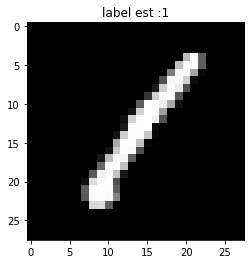

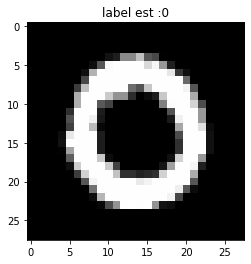

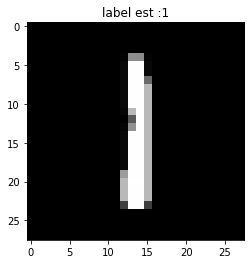

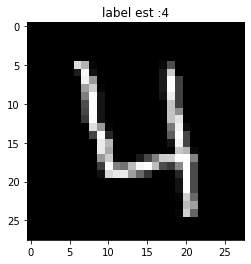

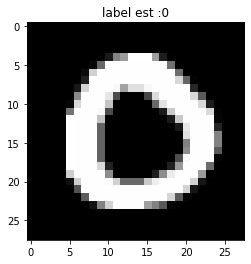

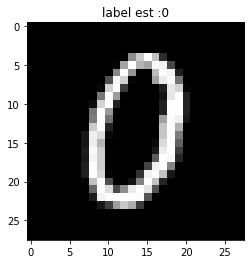

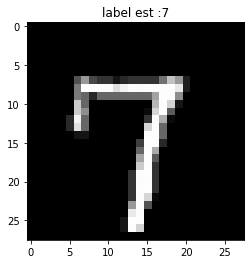

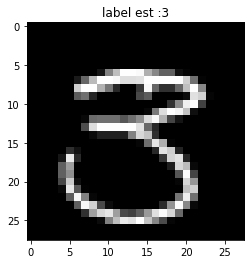

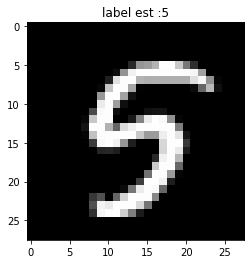

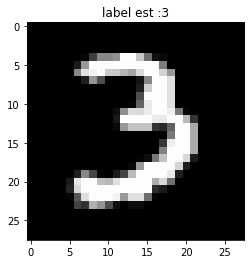

In [9]:
# plt.figure(figsize=(10,10))
for k in range(10):
    img = np.array(X_train.iloc[k])
    img = img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title("label est :"+ str(train.iloc[k,0]))
    plt.show()

In [10]:
#normalise les piwels:
X_train = X_train / 255.0
test = test / 255.0
# Reshape images 
X_train = np.array(X_train).reshape(-1,28,28,1)
test = np.array(test).reshape(-1,28,28,1)
# X_train

In [11]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
# on genere le codage pour chaque ligne dans data training => le vecteur y codé ..
y_train_encoded = pd.DataFrame(encoder.fit_transform(train[['label']]).toarray())
np.array(y_train_encoded)

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [12]:
X_train.shape

(42000, 28, 28, 1)

In [13]:
y_train_encoded.shape

(42000, 10)

In [14]:
X_training, X_val, Y_training, Y_val = train_test_split(X_train,np.array(y_train_encoded), test_size = 0.15,random_state=2)

In [15]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [16]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0

In [18]:
epcs=20
batch_size=32
history = model.fit(X_training,Y_training,epochs = epcs,validation_data=(X_val, Y_val))

Epoch 1/20
1116/1116 [==============================] - 22s 20ms/step - loss: 0.3964 - accuracy: 0.8721 - val_loss: 0.0985 - val_accuracy: 0.9667
Epoch 2/20
1116/1116 [==============================] - 21s 18ms/step - loss: 0.1490 - accuracy: 0.9518 - val_loss: 0.0705 - val_accuracy: 0.9773
Epoch 3/20
1116/1116 [==============================] - 21s 19ms/step - loss: 0.1199 - accuracy: 0.9616 - val_loss: 0.0546 - val_accuracy: 0.9816
Epoch 4/20
1116/1116 [==============================] - 21s 19ms/step - loss: 0.1016 - accuracy: 0.9681 - val_loss: 0.0495 - val_accuracy: 0.9849
Epoch 5/20
1116/1116 [==============================] - 19s 17ms/step - loss: 0.0891 - accuracy: 0.9720 - val_loss: 0.0471 - val_accuracy: 0.9856
Epoch 6/20
1116/1116 [==============================] - 20s 18ms/step - loss: 0.0802 - accuracy: 0.9749 - val_loss: 0.0434 - val_accuracy: 0.9857
Epoch 7/20
1116/1116 [==============================] - 20s 18ms/step - loss: 0.0777 - accuracy: 0.9756 - val_loss: 0.0442 -

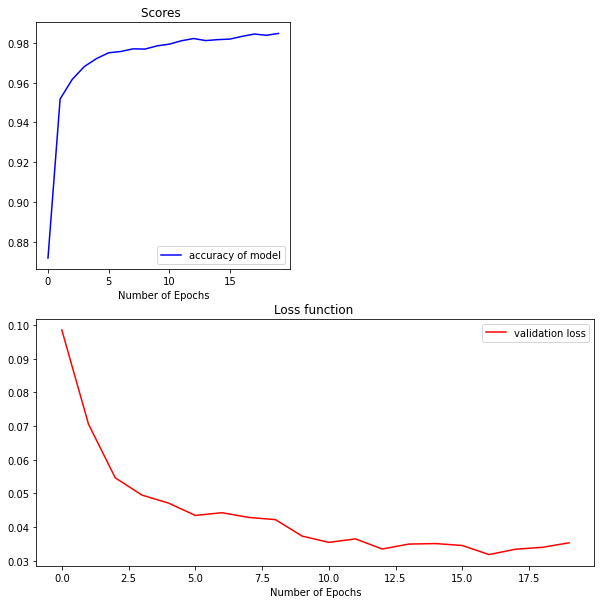

In [19]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(212)  
ax1.plot(history.history['val_loss'], color='red', label="validation loss")
ax1.set_title('Loss function ')
plt.xlabel("Number of Epochs")
ax1.legend()
ax2 = plt.subplot(221)     
plt.xlabel("Number of Epochs")
ax2.plot(history.history['accuracy'], color='b', label="accuracy of model")
ax2.set_title('Scores ')
ax2.legend()

In [20]:
# model.predict(test).shape

(28000, 10)

In [21]:
def predire(num_img):
    img = np.array(test[num_img,:])
    img = img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    predection = model.predict(test)[num_img,:].argmax()
    print("la classification de modele est "+str(predection)+"\n")
    print("l'image en realite est la suivante :")
    plt.show()
    return 0

la classification de modele est 9

l'image en realite est la suivante :


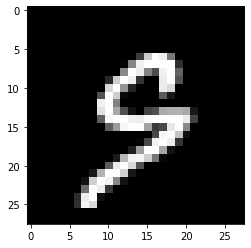

0

In [25]:
predire(1225)

In [23]:
model.save("cnn_mnist.h5")